In [150]:
# Importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from warnings import filterwarnings

pd.set_option('display.max_columns',100000)
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_colwidth',10000)

In [151]:
# Loading train dataset
train_df = pd.read_csv('E:\\UPGRAD-study\\Nikita\\Assignment\\MultiLevel Hackerthon\\train.csv')

In [152]:
# Loading test dataset
test_df = pd.read_csv('E:\\UPGRAD-study\\Nikita\\Assignment\\MultiLevel Hackerthon\\test.csv')

In [153]:
# Looking at the head of the train dataset
train_df.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,BRONZE,6,YES,NO,A40,1169,A65,NaN,A75,852,34.08,M,Umarried,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,2,SILVER,48,YES,YES,A40,5951,A61,72.0,A73,2400,48.00,F,Divorced,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,3,NaN,12,YES,NO,A46,2096,A61,68.0,A74,2078,41.56,M,Umarried,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,4,BRONZE,42,YES,YES,A40,7882,A61,73.0,A74,2380,47.60,M,Umarried,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,5,BRONZE,24,YES,NO,A40,4870,A61,52.0,A73,1756,52.68,M,Umarried,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [154]:
# Looking at the head of the train dataset
test_df.head()

,serial number,account_info,duration_month,Loan,Regularity,Purpose,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,1,NaN,12,YES,YES,A40,A63,517.0,A73,1134,45.36,F,Divorced,A101,4,A123,29,A143,A151,1,A172,1,A191,A201
1,2,BRONZE,48,YES,NO,A40,A61,18.0,A75,783,31.32,M,Umarried,A101,4,A124,46,A143,A153,2,A173,1,A192,A201
2,3,GOLD,24,YES,YES,A40,A62,389.0,A75,1181,47.24,F,Divorced,A101,2,A124,47,A143,A153,1,A173,1,A192,A201
3,4,SILVER,30,YES,NO,A49,A62,326.0,A75,853,34.12,M,Umarried,A101,2,A122,41,A142,A152,2,A173,1,A191,A201
4,5,SILVER,27,YES,YES,A49,A61,16.0,A72,888,35.52,F,Divorced,A101,1,A122,32,A143,A152,1,A173,2,A192,A201


In [155]:
# Removing serial no column and storing it in a new variable
train_serial_no = train_df.pop('serial number')
train_serial_no.head(3)

0    1
1    2
2    3
Name: serial number, dtype: int64

In [156]:
# Removing serial no column and storing it in a new variable
test_serial_no = test_df.pop('serial number')
test_serial_no.head(3)

0    1
1    2
2    3
Name: serial number, dtype: int64

In [157]:
# Looking at the shape of the dataset i.e no. of rows and columns in a dataset
train_df.shape

(700, 24)

In [158]:
# Looking at the description
train_df.describe()

,duration_month,credit_amount,Saving Account,Salary,investment,resident_since,age,credits_no,liables
count,700.000000,700.000000,580.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,20.652857,3182.331429,265.208621,1610.258571,39.365286,2.808571,35.322857,1.392857,1.148571
std,12.279683,2725.319217,569.396113,784.923838,6.784642,1.114573,11.319842,0.572328,0.355920
min,4.000000,276.000000,1.000000,700.000000,26.010000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1350.750000,34.000000,953.500000,33.742500,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2253.000000,70.000000,1265.500000,39.570000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3913.250000,137.500000,2198.250000,44.765000,4.000000,41.000000,2.000000,1.000000
max,72.000000,15945.000000,3791.000000,3499.000000,53.610000,4.000000,75.000000,4.000000,2.000000


In [159]:
# Checking for info i.e no of rows,datatypes and null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 24 columns):
account_info        427 non-null object
duration_month      700 non-null int64
Loan                700 non-null object
Regularity          700 non-null object
Purpose             700 non-null object
credit_amount       700 non-null int64
savings_account     700 non-null object
Saving Account      580 non-null float64
employment_st       700 non-null object
Salary              700 non-null int64
investment          700 non-null float64
Gender              700 non-null object
Status              700 non-null object
gurantors           700 non-null object
resident_since      700 non-null int64
property_type       700 non-null object
age                 700 non-null int64
installment_type    700 non-null object
housing_type        700 non-null object
credits_no          700 non-null int64
job_type            700 non-null object
liables             700 non-null int64
telephone           

In [160]:
# check for % missing value 
(train_df.isnull().sum()/train_df.shape[0])*100

account_info        39.000000
duration_month       0.000000
Loan                 0.000000
Regularity           0.000000
Purpose              0.000000
credit_amount        0.000000
savings_account      0.000000
Saving Account      17.142857
employment_st        0.000000
Salary               0.000000
investment           0.000000
Gender               0.000000
Status               0.000000
gurantors            0.000000
resident_since       0.000000
property_type        0.000000
age                  0.000000
installment_type     0.000000
housing_type         0.000000
credits_no           0.000000
job_type             0.000000
liables              0.000000
telephone            0.000000
foreigner            0.000000
dtype: float64

### Visualisation

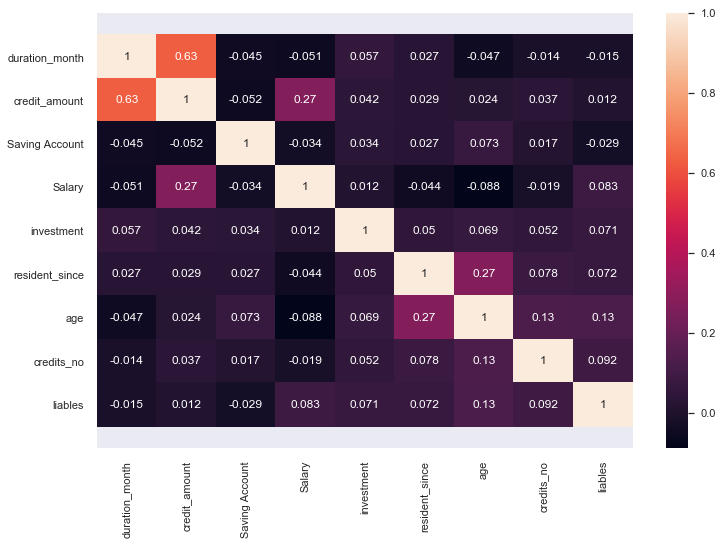

In [161]:
# From the below heat map we can now see which variables are poorly correlated and which ones are strongly correlated

plt.figure(figsize=(12,8))
ax=sns.heatmap(train_df.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()


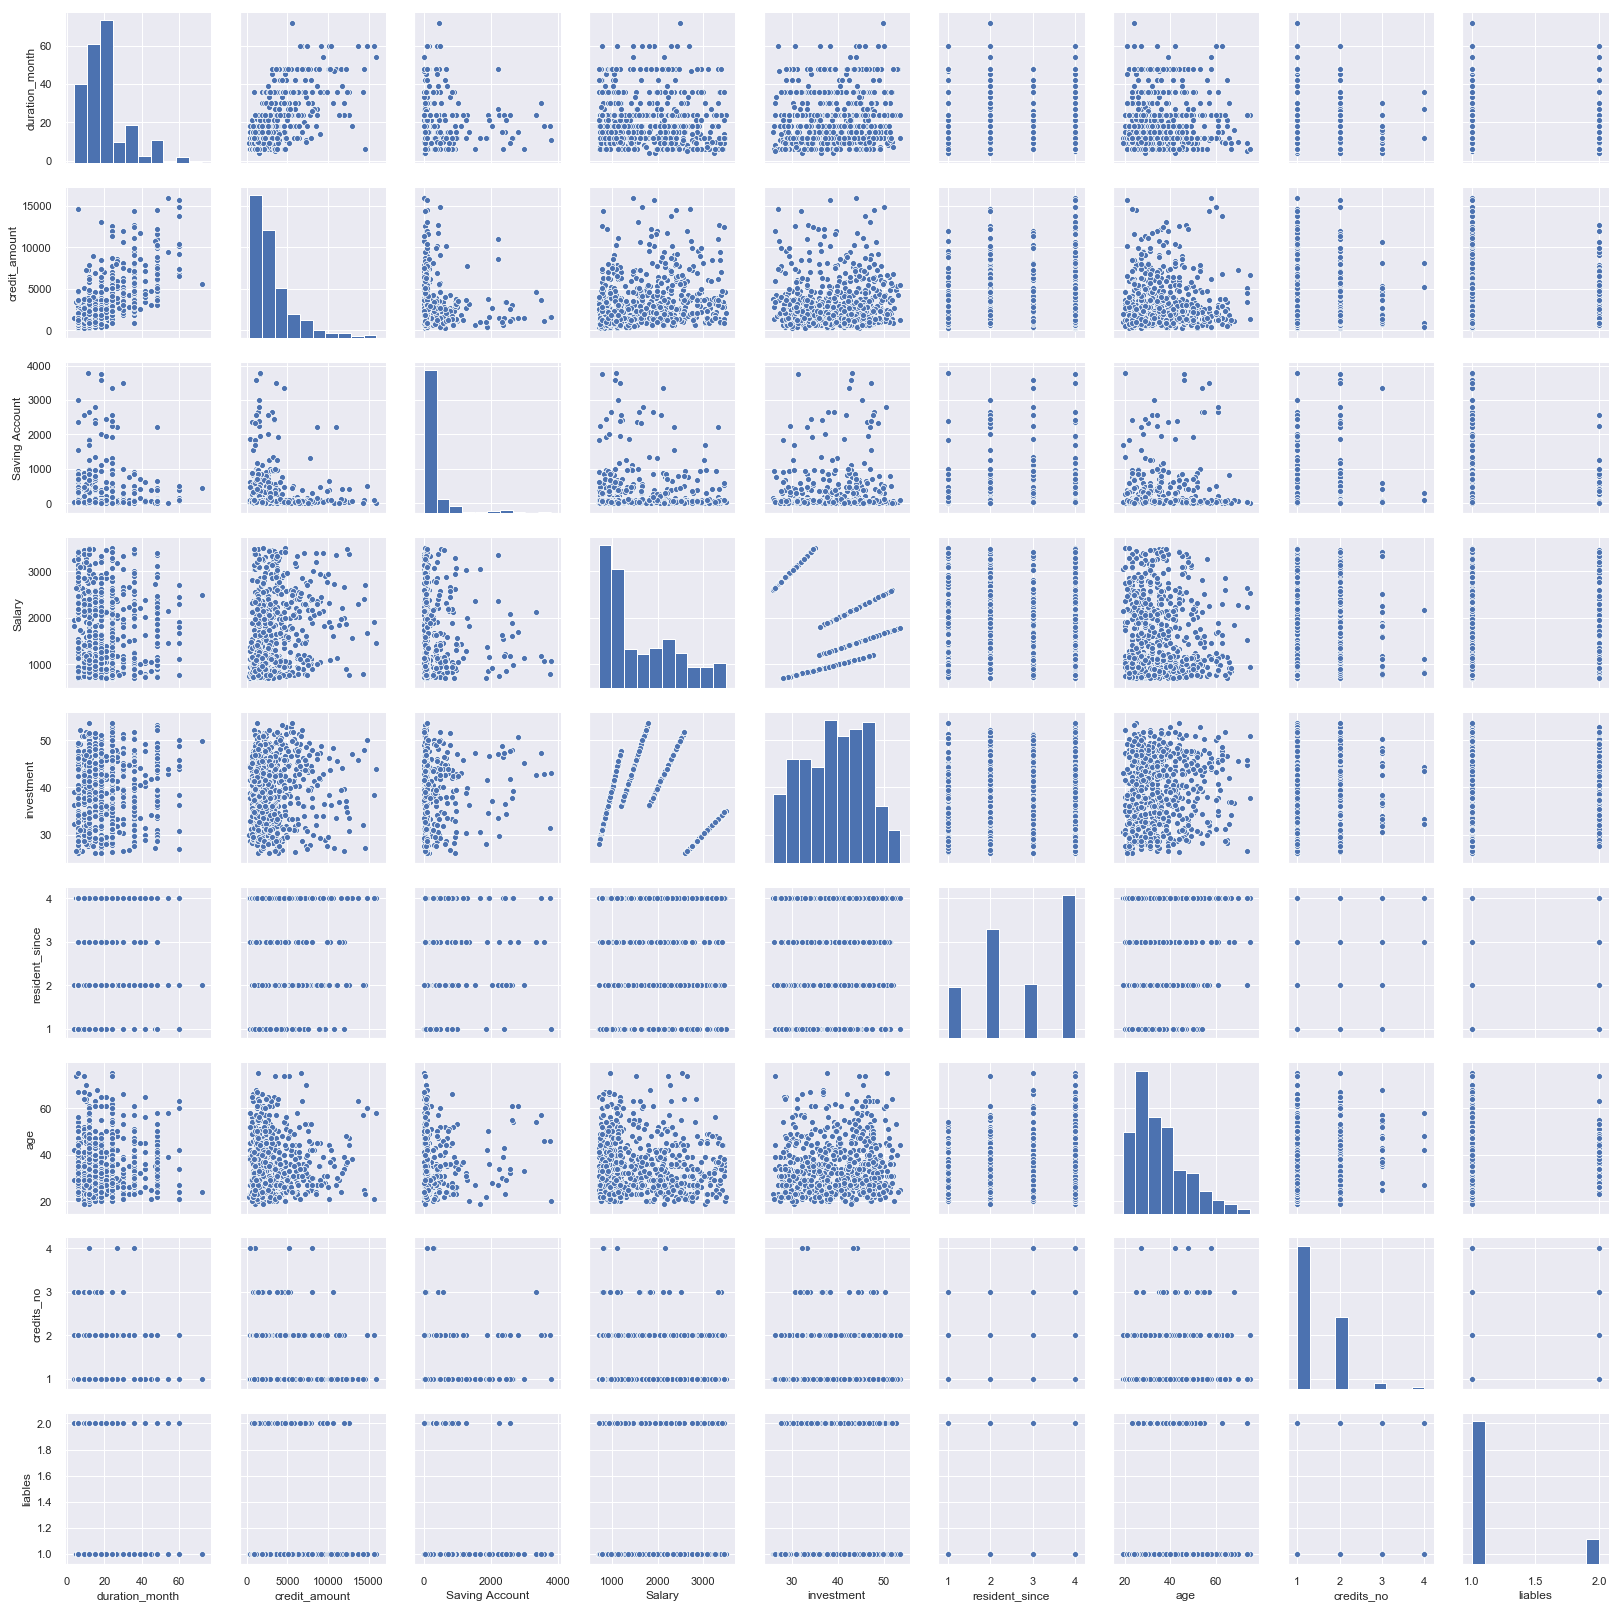

In [162]:
# Plotting pairplot for checking correlation with y variable
sns.pairplot(train_df,palette=sns.color_palette(),)
plt.show()

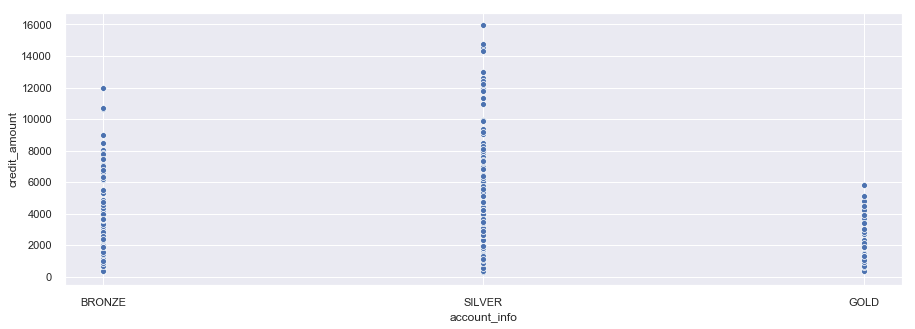

In [163]:
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
sns.scatterplot(x="account_info", y="credit_amount", data=train_df)
plt.show()

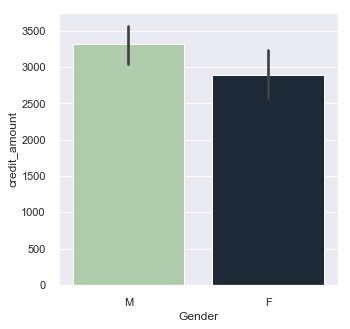

In [164]:
plt.figure(figsize=(5,5))
sns.set(style="darkgrid")

sns.barplot(x="Gender", y="credit_amount", data=train_df,palette="ch:r=-.5,l=.75")
plt.show()

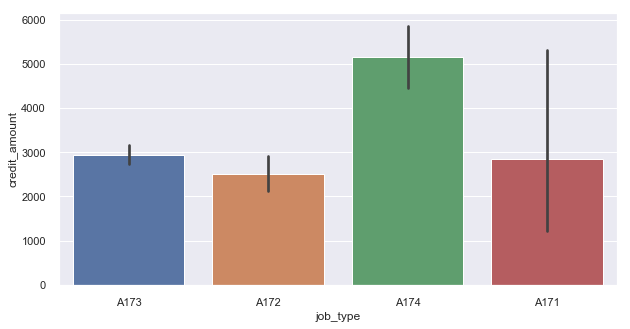

In [165]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.barplot(x="job_type", y="credit_amount", data=train_df)
plt.show()

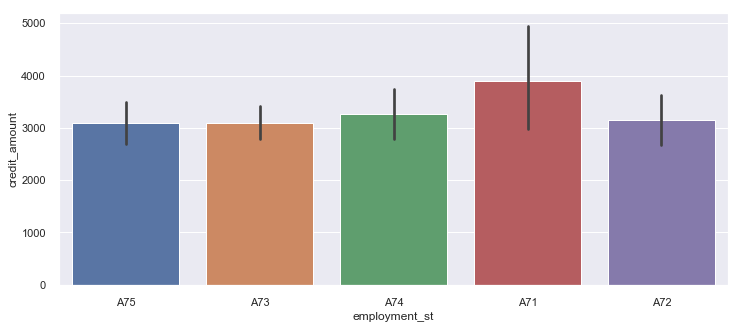

In [166]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.barplot(x="employment_st", y="credit_amount", data=train_df)
plt.show()

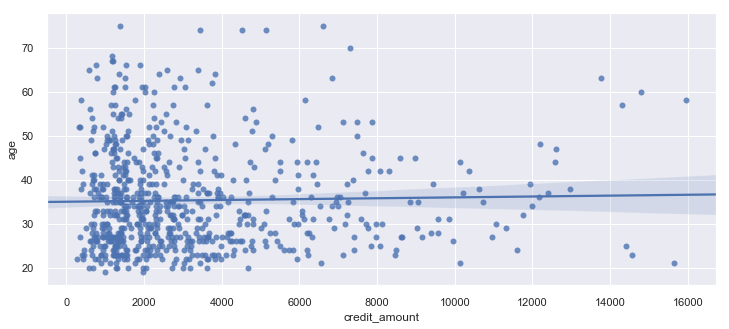

In [167]:
plt.figure(figsize=(12,5))
sns.axes_style("darkgrid")
sns.regplot(x="credit_amount",y='age',data=train_df)
plt.show()

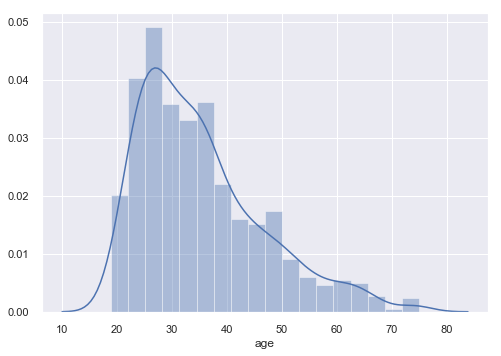

In [168]:
sns.distplot(train_df['age'],kde=True)
plt.show()

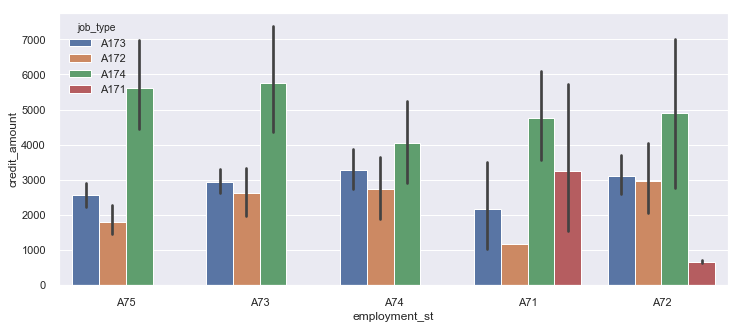

In [169]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.barplot(x="employment_st", y="credit_amount",hue="job_type", data=train_df)
plt.show()

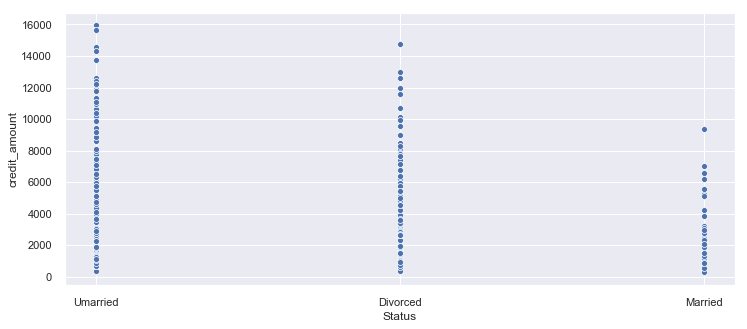

In [170]:
plt.figure(figsize=(12,5))
sns.set(style="darkgrid")
sns.scatterplot(x="Status", y="credit_amount",data=train_df)
plt.show()

In [171]:
# Checking at the columns with datatype = 'object'
objectdtypes=list(train_df.select_dtypes(include='object').columns)
for i in objectdtypes:
    print('Value counts of {0} '.format(i))
    print(train_df[i].value_counts())
    print('----------------------------------------')

Value counts of account_info 
SILVER    197
BRONZE    183
GOLD       47
Name: account_info, dtype: int64
----------------------------------------
Value counts of Loan 
YES    642
NO      58
Name: Loan, dtype: int64
----------------------------------------
Value counts of Regularity 
YES    434
NO     266
Name: Regularity, dtype: int64
----------------------------------------
Value counts of Purpose 
A40     575
A49      68
A46      40
A410     10
A48       7
Name: Purpose, dtype: int64
----------------------------------------
Value counts of savings_account 
A61    427
A65    120
A62     77
A63     42
A64     34
Name: savings_account, dtype: int64
----------------------------------------
Value counts of employment_st 
A73    244
A75    168
A74    126
A72    118
A71     44
Name: employment_st, dtype: int64
----------------------------------------
Value counts of Gender 
M    484
F    216
Name: Gender, dtype: int64
----------------------------------------
Value counts of Status 
Umarried

In [172]:
# Storing all the variable in list dummy_var_3 which have value_counts greater than 2
dummy_vars_3=[]
for i in objectdtypes:
    if len(train_df[i].value_counts())>2:
        print('Value counts of {0} : '.format(i),len(train_df[i].value_counts()))
        print('----------------------------------------')
        dummy_vars_3.append(i)

Value counts of account_info :  3
----------------------------------------
Value counts of Purpose :  5
----------------------------------------
Value counts of savings_account :  5
----------------------------------------
Value counts of employment_st :  5
----------------------------------------
Value counts of Status :  3
----------------------------------------
Value counts of gurantors :  3
----------------------------------------
Value counts of property_type :  4
----------------------------------------
Value counts of installment_type :  3
----------------------------------------
Value counts of housing_type :  3
----------------------------------------
Value counts of job_type :  4
----------------------------------------


In [173]:
# Storing all the variable in list dummy_var_3 which have value_counts less than 2
dummy_vars_2=[]
for i in objectdtypes:
    if len(train_df[i].value_counts())<3:
        print('Value counts of {0} : '.format(i),len(train_df[i].value_counts()))
        print('----------------------------------------')
        dummy_vars_2.append(i)

Value counts of Loan :  2
----------------------------------------
Value counts of Regularity :  2
----------------------------------------
Value counts of Gender :  2
----------------------------------------
Value counts of telephone :  2
----------------------------------------
Value counts of foreigner :  2
----------------------------------------


In [174]:
# Defining the map function
def binary_map(x):
    return x.map({"YES":1,"NO":0,"M":1,"F":0,"A191":0,"A192":1,"A201":1,"A202":0})

In [175]:
# Mapping the varibales with max 2 value counts in both train and test
train_df[dummy_vars_2]= train_df[dummy_vars_2].apply(binary_map)
test_df[dummy_vars_2]= test_df[dummy_vars_2].apply(binary_map)

In [176]:
# Checking head after mapping 
train_df.head()

,account_info,duration_month,Loan,Regularity,Purpose,credit_amount,savings_account,Saving Account,employment_st,Salary,investment,Gender,Status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
0,BRONZE,6,1,0,A40,1169,A65,NaN,A75,852,34.08,1,Umarried,A101,4,A121,67,A143,A152,2,A173,1,1,1
1,SILVER,48,1,1,A40,5951,A61,72.0,A73,2400,48.00,0,Divorced,A101,2,A121,22,A143,A152,1,A173,1,0,1
2,NaN,12,1,0,A46,2096,A61,68.0,A74,2078,41.56,1,Umarried,A101,3,A121,49,A143,A152,1,A172,2,0,1
3,BRONZE,42,1,1,A40,7882,A61,73.0,A74,2380,47.60,1,Umarried,A103,4,A122,45,A143,A153,1,A173,2,0,1
4,BRONZE,24,1,0,A40,4870,A61,52.0,A73,1756,52.68,1,Umarried,A101,4,A124,53,A143,A153,2,A173,2,0,1


### Creating Dummies

In [177]:
# creating dummies for more than 2 values
dummy = pd.get_dummies(train_df[dummy_vars_3], drop_first=True,prefix=train_df[dummy_vars_3].columns)
train_df = pd.concat([train_df,dummy],axis=1)

dummy = pd.get_dummies(test_df[dummy_vars_3], drop_first=True,prefix=test_df[dummy_vars_3].columns)
test_df = pd.concat([test_df,dummy],axis=1)

In [178]:
# Dropping original columns
train_df.drop(columns=dummy_vars_3,axis=1,inplace=True)
test_df.drop(columns=dummy_vars_3,axis=1,inplace=True)

In [179]:
# Looking at the shape of train after dummies
train_df.shape

(700, 42)

In [180]:
# Looking at the shape of test after dummies
test_df.shape

(300, 41)

### X_train,y_train.X_test

In [181]:
y_train = train_df.pop('credit_amount')
X_train = train_df
X_test = test_df

## Scaling using Standard Scaling

In [182]:
# importing libraries 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [183]:
# Creating list of numeric columns for scaling
num_var = ['duration_month','Salary','resident_since','age','credits_no','liables','investment','Saving Account']

In [184]:
# Scaling on X_train
X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [185]:
# checking head after scaling
X_train.head()

,duration_month,Loan,Regularity,Saving Account,Salary,investment,Gender,resident_since,age,credits_no,liables,telephone,foreigner,account_info_GOLD,account_info_SILVER,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,employment_st_A72,employment_st_A73,employment_st_A74,employment_st_A75,Status_Married,Status_Umarried,gurantors_A102,gurantors_A103,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174
0,-1.194113,1,0,NaN,-0.966719,-0.779564,1,1.069720,2.800374,1.061588,-0.417728,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,2.228616,1,1,-0.339615,1.006857,1.273595,0,-0.725973,-1.177789,-0.686910,-0.417728,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
2,-0.705152,1,0,-0.346646,0.596333,0.323714,1,0.171873,1.209109,-0.686910,2.393903,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0
3,1.739655,1,1,-0.337857,0.981359,1.214596,1,1.069720,0.855495,-0.686910,2.393903,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,1,0
4,0.272771,1,0,-0.374770,0.185809,1.963882,1,1.069720,1.562724,1.061588,2.393903,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0


In [186]:
# checking for y train data
y_train.head()

0    1169
1    5951
2    2096
3    7882
4    4870
Name: credit_amount, dtype: int64

In [187]:
# Scaling for test data
X_test[num_var] = scaler.fit_transform(X_test[num_var])

In [188]:
# Looking at test data
X_test.head()

,duration_month,Loan,Regularity,Saving Account,Salary,investment,Gender,resident_since,age,credits_no,liables,telephone,foreigner,account_info_GOLD,account_info_SILVER,Purpose_A410,Purpose_A46,Purpose_A48,Purpose_A49,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,employment_st_A72,employment_st_A73,employment_st_A74,employment_st_A75,Status_Married,Status_Umarried,gurantors_A102,gurantors_A103,property_type_A122,property_type_A123,property_type_A124,installment_type_A142,installment_type_A143,housing_type_A152,housing_type_A153,job_type_A172,job_type_A173,job_type_A174
0,-0.824450,1,1,0.341234,-0.620308,0.874652,0,0.997015,-0.615178,-0.747590,-0.452570,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
1,2.304173,1,0,-0.419484,-1.087029,-1.244985,1,0.997015,0.864731,0.951479,-0.452570,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0
2,0.218424,1,1,0.146100,-0.557813,1.158478,0,-0.866564,0.951785,-0.747590,-0.452570,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0
3,0.739862,1,0,0.050057,-0.993951,-0.822265,1,-0.866564,0.429464,0.951479,-0.452570,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0
4,0.479143,1,1,-0.422533,-0.947412,-0.610905,0,-1.798353,-0.354018,-0.747590,2.209605,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0


In [189]:
# importing XG Boost for XG Boost Regressor
import xgboost as xgb

In [190]:
#Create the model and train
xg_reg = xgb.XGBRegressor(alpha=10, 
                          sampling_method = "gradient_based",
                          base_score=0.5, 
                          booster="gblinear", 
                          colsample_bylevel=1,
                          colsample_bynode=1, 
                          colsample_bytree=0.3, 
                          gamma=0, 
                          gpu_id=-1,
                          importance_type='gain', 
                          interaction_constraints=None,
                          learning_rate=0.1, 
                          max_delta_step=0, 
                          max_depth=6,
                          min_child_weight=1, 
                          monotone_constraints=None,
                          n_estimators=10, 
                          n_jobs=-1, 
                          num_parallel_tree=1,
                          objective='reg:squarederror', 
                          random_state=0, 
                          reg_alpha=10,
                          reg_lambda=2, 
                          scale_pos_weight=1, 
                          subsample=0.6, 
                          tree_method=None,
                          validate_parameters=False, 
                          verbosity=None,
                          seed = 42)

In [191]:
# Fitiing on Trin data
xg_reg.fit(X_train,y_train)

# predict the results for test
preds = xg_reg.predict(X_test)

In [193]:
# Write the result to csv
test_serial_no = list(test_serial_no)
result = pd.DataFrame({"S.no":test_serial_no, "credit_amount":preds})
result.to_csv('XGB_Submission2.csv', index=False)